Team Name: ADA_18

In [2]:
import pandas as pd

# Load the dataset from the Excel file
file_path = 'marketing_campaign.xlsx'
data = pd.read_excel(file_path, sheet_name='Sheet1')

# Drop the specified columns
columns_to_drop = [
    'Z_CostContact', 'Z_Revenue', 'Response',
    'NumDealsPurchases', 'NumCatalogPurchases',
    'NumStorePurchases', 'NumWebPurchases',
    'NumWebVisitsMonth', 'Complain'
]
data = data.drop(columns=columns_to_drop)

# Add a new column 'TotalAmountSpent' by summing the relevant columns
data['TotalAmountSpent'] = (
    data['MntFishProducts'] +
    data['MntMeatProducts'] +
    data['MntFruits'] +
    data['MntSweetProducts'] +
    data['MntWines'] +
    data['MntGoldProds']
)

# Rename columns with the new names
columns_rename_mapping = {
    'MntFishProducts': 'Item D',
    'MntMeatProducts': 'Item C',
    'MntFruits': 'Item B',
    'MntSweetProducts': 'Item E',
    'MntWines': 'Item A',
    'MntGoldProds': 'Item F'
}

# Apply the renaming to the DataFrame
data = data.rename(columns=columns_rename_mapping)

# Add a new column 'T/C' that is 1 if any of the campaign columns contain 1, otherwise 0
data['T/C'] = (
    (data['AcceptedCmp1'] == 1) |
    (data['AcceptedCmp2'] == 1) |
    (data['AcceptedCmp3'] == 1) |
    (data['AcceptedCmp4'] == 1) |
    (data['AcceptedCmp5'] == 1)
).astype(int)

# Ensure that the 'Dt_Customer' column is in datetime format
data['Dt_Customer'] = pd.to_datetime(data['Dt_Customer'])

# Sort the dataset in ascending order of the 'Dt_Customer' column
data = data.sort_values(by='Dt_Customer', ascending=True)

# Save the modified DataFrame to a new CSV file
output_file_path = 'modified_marketing_campaign.csv'
data.to_csv(output_file_path, index=False)

print(f"Modified data saved to {output_file_path}")


Modified data saved to modified_marketing_campaign.csv


Basic Summary Statistics:
                 ID   Year_Birth         Income      Kidhome     Teenhome  \
count   2240.000000  2240.000000    2216.000000  2240.000000  2240.000000   
mean    5592.159821  1968.805804   52247.251354     0.444196     0.506250   
min        0.000000  1893.000000    1730.000000     0.000000     0.000000   
25%     2828.250000  1959.000000   35303.000000     0.000000     0.000000   
50%     5458.500000  1970.000000   51381.500000     0.000000     0.000000   
75%     8427.750000  1977.000000   68522.000000     1.000000     1.000000   
max    11191.000000  1996.000000  666666.000000     2.000000     2.000000   
std     3246.662198    11.984069   25173.076661     0.538398     0.544538   

                         Dt_Customer      Recency       Item A       Item B  \
count                           2240  2240.000000  2240.000000  2240.000000   
mean   2013-07-10 10:01:42.857143040    49.109375   303.935714    26.302232   
min              2012-07-30 00:00:00     0.

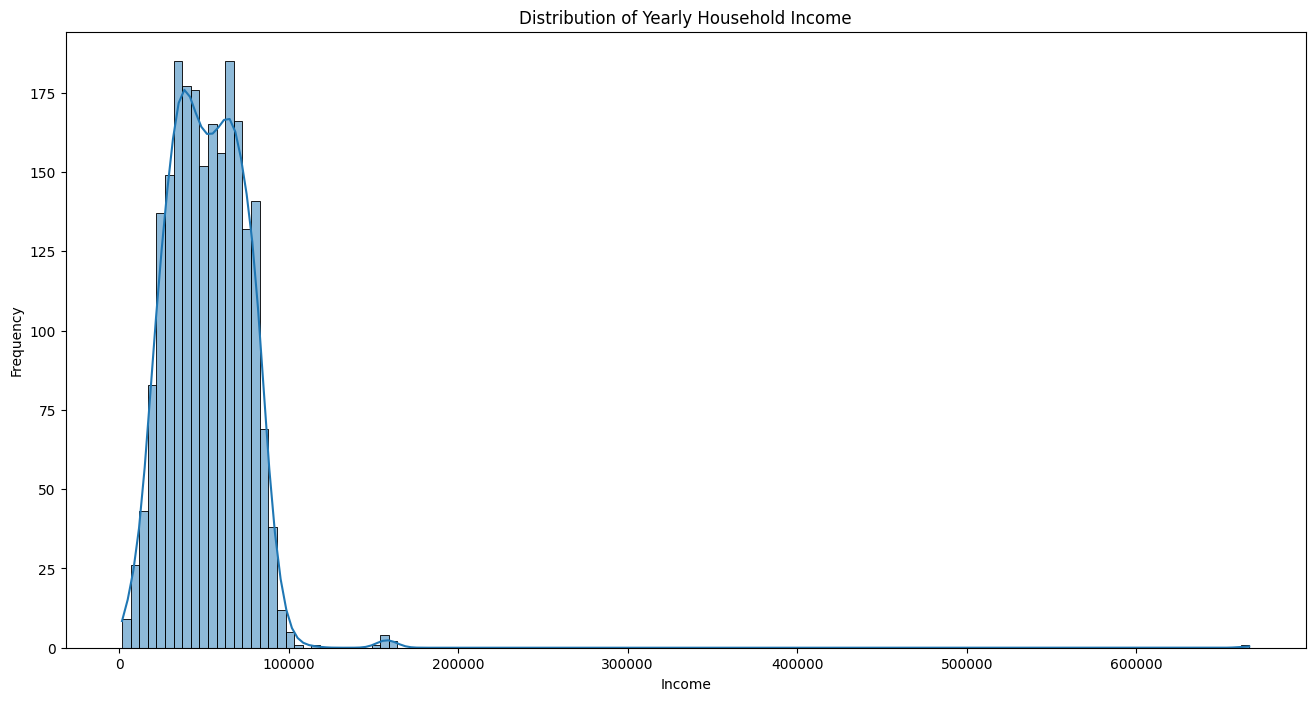

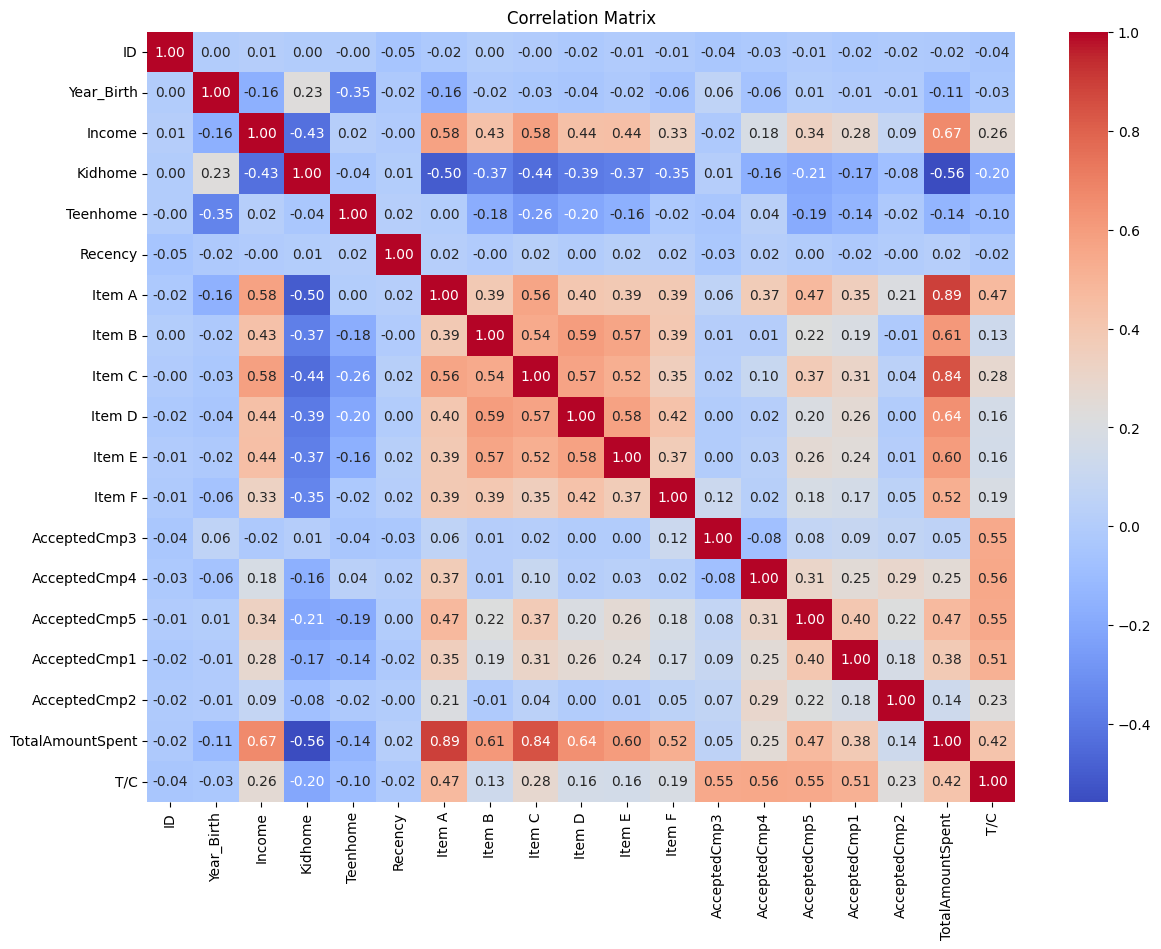

C:\Users\Vidhathri V\AppData\Local\Temp\ipykernel_39956\3490554209.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='T/C', data=data, palette='Set2')


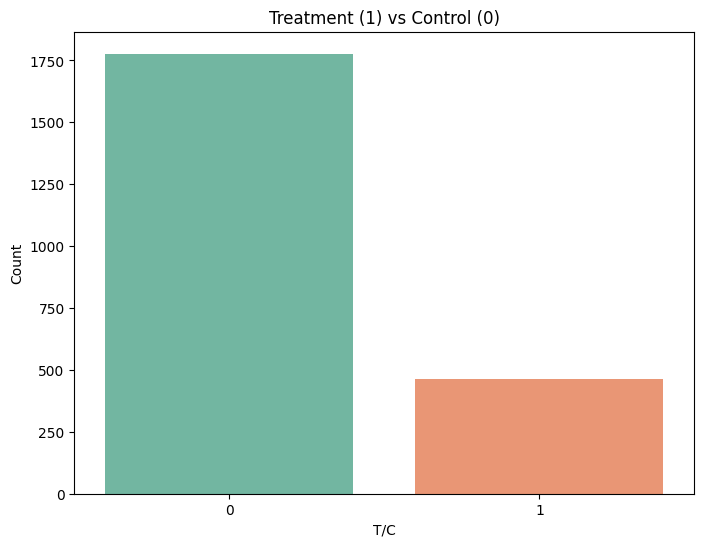

C:\Users\Vidhathri V\AppData\Local\Temp\ipykernel_39956\3490554209.py:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='T/C', y='Income', data=data, palette='Set3')


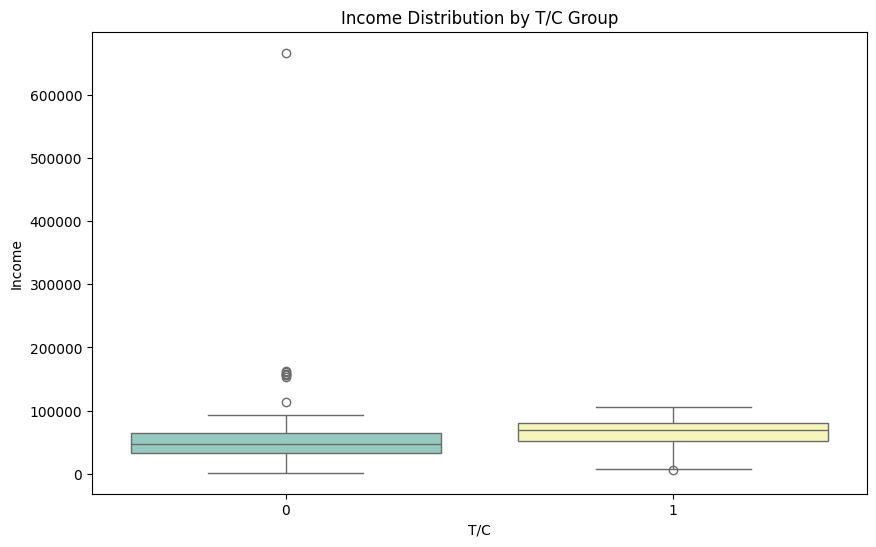

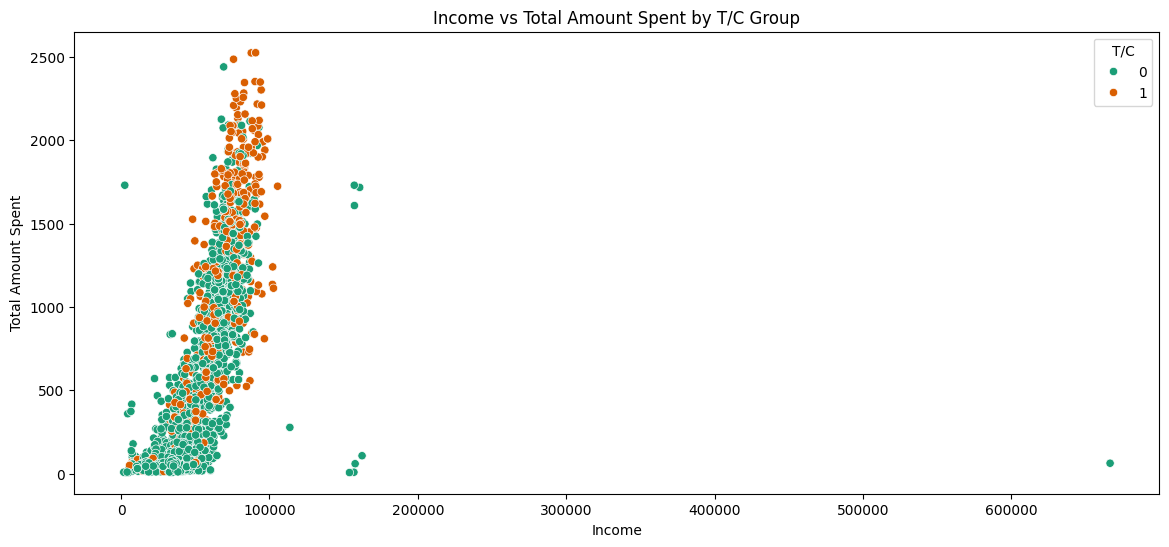


Average Total Amount Spent by Group:
   T/C  TotalAmountSpent
0    0        477.805290
1    1       1097.036717


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = 'modified_marketing_campaign.csv'
data = pd.read_csv(file_path)

# Convert the 'Dt_Customer' column to datetime format using the correct format
data['Dt_Customer'] = pd.to_datetime(data['Dt_Customer'], format='%Y-%m-%d')

# Basic summary statistics
print("Basic Summary Statistics:")
print(data.describe())

# Check for missing values
print("\nMissing Values:")
print(data.isnull().sum())

# Select only numeric columns for the correlation matrix
numeric_data = data.select_dtypes(include=['number'])

# Visualize distributions of numerical columns
plt.figure(figsize=(16, 8))
sns.histplot(data['Income'].dropna(), kde=True)
plt.title('Distribution of Yearly Household Income')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.show()

# Plot the correlation matrix
plt.figure(figsize=(14, 10))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

# Count plot for 'T/C' (treatment vs control group)
plt.figure(figsize=(8, 6))
sns.countplot(x='T/C', data=data, palette='Set2')
plt.title('Treatment (1) vs Control (0)')
plt.xlabel('T/C')
plt.ylabel('Count')
plt.show()

# Box plot to show income distribution by treatment/control group
plt.figure(figsize=(10, 6))
sns.boxplot(x='T/C', y='Income', data=data, palette='Set3')
plt.title('Income Distribution by T/C Group')
plt.xlabel('T/C')
plt.ylabel('Income')
plt.show()

# Feature exploration for total spending
plt.figure(figsize=(14, 6))
sns.scatterplot(x='Income', y='TotalAmountSpent', hue='T/C', data=data, palette='Dark2')
plt.title('Income vs Total Amount Spent by T/C Group')
plt.xlabel('Income')
plt.ylabel('Total Amount Spent')
plt.show()

# Group by to summarize average spending by treatment/control groups
summary_by_group = data.groupby('T/C')['TotalAmountSpent'].mean().reset_index()
print("\nAverage Total Amount Spent by Group:")
print(summary_by_group)


In [11]:
print(data.columns)


Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'Item A', 'Item B', 'Item C',
       'Item D', 'Item E', 'Item F', 'AcceptedCmp3', 'AcceptedCmp4',
       'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'TotalAmountSpent',
       'T/C'],
      dtype='object')


Label mapping for Education:
  2n Cycle: 0
  Basic: 1
  Graduation: 2
  Master: 3
  PhD: 4
Label mapping for Marital_Status:
  Absurd: 0
  Alone: 1
  Divorced: 2
  Married: 3
  Single: 4
  Together: 5
  Widow: 6
  YOLO: 7


C:\Users\Vidhathri V\AppData\Local\Temp\ipykernel_39956\420570637.py:14: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  data['Dt_Customer'] = pd.to_datetime(data['Dt_Customer'], infer_datetime_format=True)
C:\Users\Vidhathri V\AppData\Local\Temp\ipykernel_39956\420570637.py:51: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='T/C', data=balanced_data, palette='husl')


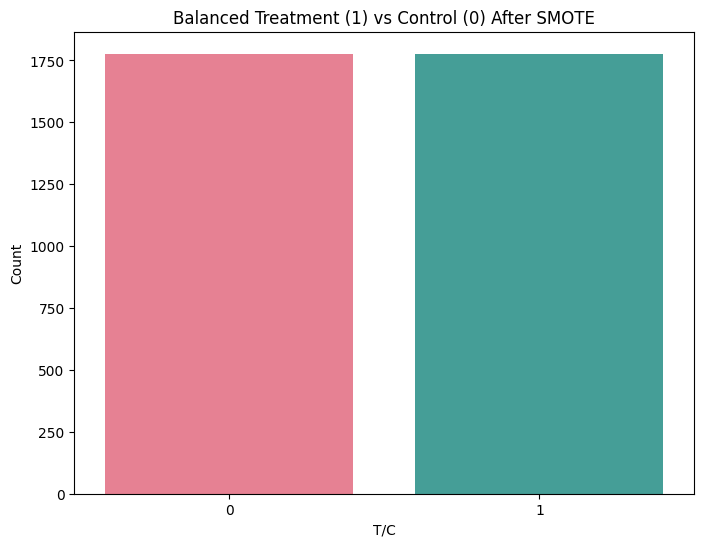

In [21]:
# Necessary imports
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE

# Load the dataset
file_path = 'modified_marketing_campaign.csv'
data = pd.read_csv(file_path)

# Fill missing values in the 'Income' column with the median
data['Income'].fillna(data['Income'].median(), inplace=True)

# Convert 'Dt_Customer' to datetime format if needed
data['Dt_Customer'] = pd.to_datetime(data['Dt_Customer'], infer_datetime_format=True)

# Apply Label Encoding to categorical columns
label_encoder = LabelEncoder()
categorical_columns = ['Education', 'Marital_Status']  # Replace with your actual categorical columns

label_mappings = {}
for column in categorical_columns:
    data[column] = label_encoder.fit_transform(data[column])
    # Store the label mapping
    label_mappings[column] = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

# Print label mappings for 'Education' and 'Marital_Status'
for column, mapping in label_mappings.items():
    print(f"Label mapping for {column}:")
    for category, label in mapping.items():
        print(f"  {category}: {label}")

# Separate features (X) and target (y)
X = data.drop(columns=['T/C', 'Dt_Customer'])  # Remove 'Dt_Customer' if it's not needed
y = data['T/C']

# Apply SMOTE to balance the treatment and control groups
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Combine resampled data for further analysis
balanced_data = pd.concat([pd.DataFrame(X_resampled, columns=X.columns), pd.DataFrame(y_resampled, columns=['T/C'])], axis=1)

# Save the balanced data to a new CSV file
balanced_data.to_csv('balanced_marketing_campaign.csv', index=False)

# Plotting count of treatment vs control after SMOTE
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.countplot(x='T/C', data=balanced_data, palette='husl')
plt.title('Balanced Treatment (1) vs Control (0) After SMOTE')
plt.xlabel('T/C')
plt.ylabel('Count')
plt.show()


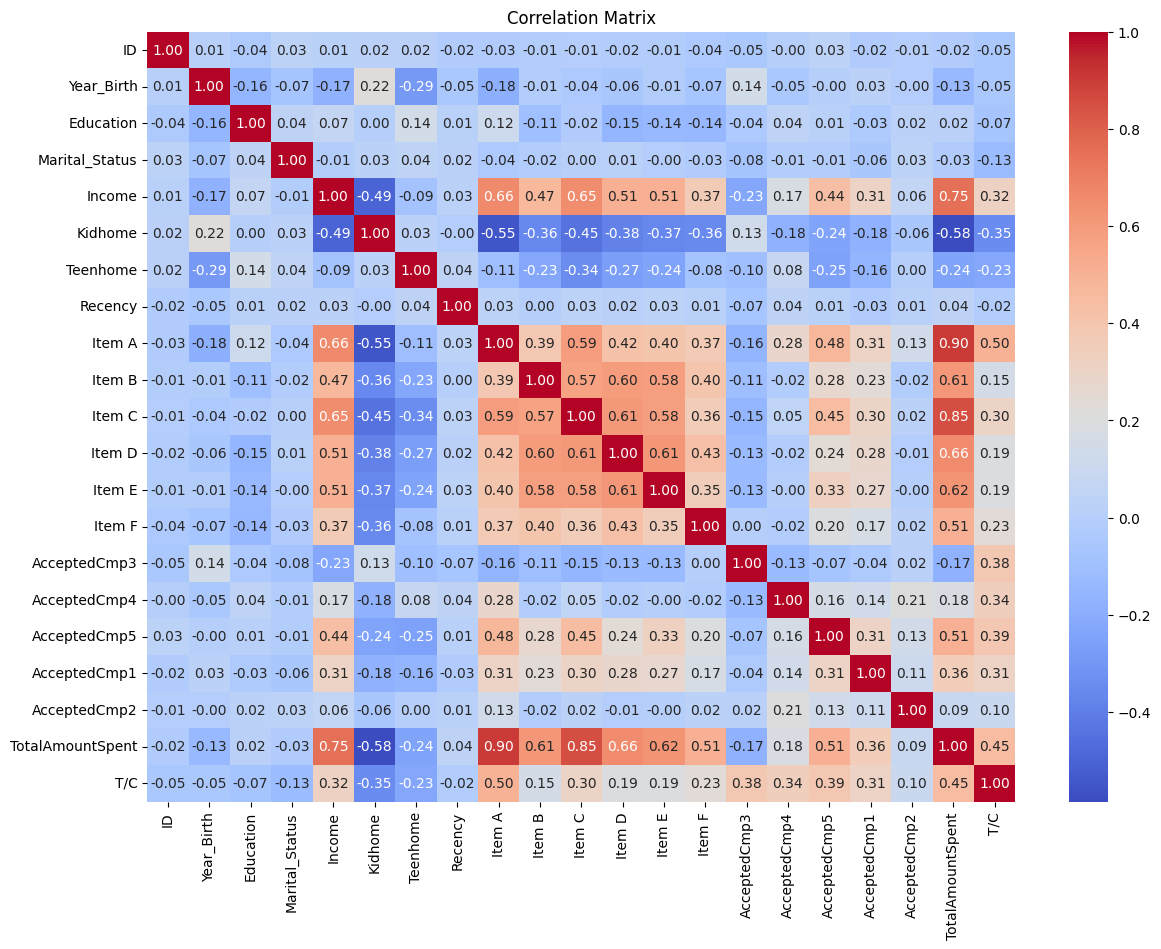

In [20]:
# Load the dataset
data = pd.read_csv('balanced_marketing_campaign.csv')
# Select only numeric columns for the correlation matrix
numeric_data = data.select_dtypes(include=['number'])
# Plot the correlation matrix
plt.figure(figsize=(14, 10))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


Spending and Income Patterns:

Income and TotalAmountSpent: There is a strong positive correlation between Income and TotalAmountSpent (~0.75), which indicates that higher-income customers tend to have a higher total expenditure. This suggests that income could be a key factor influencing customer spending, making high-income individuals potentially valuable for premium or high-value campaigns.
Income and Specific Items:
Item A and Income (~0.66): This moderate to strong correlation indicates that spending on Item A is particularly high among higher-income individuals.
Items C, D, and Income (~0.65, ~0.58): Spending on these items also shows a notable positive correlation with income, indicating that certain items may be more appealing or accessible to higher-income customers.
Correlation Among Items:

High Positive Correlation Between Items:
Items A and B (~0.59): This moderate correlation implies that customers who spend on Item A often also spend on Item B.
Items D and E (~0.58), Items A and D (~0.52): Customers who spend on one of these items also tend to spend on others, indicating overlapping purchasing preferences. These inter-item correlations suggest that some products may be marketed together or bundled.
Campaign Acceptance Patterns:

Accepted Campaigns and Total Spending:
AcceptedCmp1, AcceptedCmp5, and TotalAmountSpent (~0.39): Moderate correlations between these campaigns and total spending indicate that customers who accept certain campaigns also tend to be higher spenders, making them an attractive segment for targeted marketing.
AcceptedCmp1 with AcceptedCmp5 (~0.34): This moderate correlation suggests a common pattern where customers who accept one campaign are more likely to accept another. There’s also a smaller positive correlation among other campaign acceptance variables, indicating a trend of multi-campaign engagement.
AcceptedCmp4 with Item Purchases:
AcceptedCmp4 with Items A and C (~0.28): This moderate positive correlation could imply that customers who tend to accept campaigns are more inclined to spend on particular items, like A and C. Campaign-specific targeting for these items could be beneficial.
Demographic Patterns:

Year_Birth and TotalAmountSpent (~0.23): This weak positive correlation suggests that younger individuals might spend slightly more. However, the effect is not strong enough to make concrete conclusions about age and spending habits.
Income and Kidhome (-0.49): The negative correlation indicates that families with more children at home tend to have lower incomes, which might imply financial constraints related to larger household sizes. Marketers could tailor more cost-effective campaigns for this group.
Income and Teenhome (-0.23): Although weaker, this negative correlation suggests that families with teenagers might also have slightly lower incomes, though less pronounced than Kidhome.
Recency (Last Purchase) Patterns:

Recency and TotalAmountSpent (-0.17): The weak negative correlation here indicates that customers who have recently made purchases may have slightly lower total spending, suggesting a tendency for recent purchasers to have made smaller transactions. This could help in identifying segments that may need re-engagement or targeted upsell efforts.
TotalAmountSpent Correlations with Items:

TotalAmountSpent with Item A, B, C, D, and E:
Item A and TotalAmountSpent (~0.90), Item B (~0.85), C (~0.85), D (~0.83), E (~0.66): The strong correlation of individual items with TotalAmountSpent indicates that most of the total spending is driven by spending on these items, with Item A being the highest contributor. Marketers could focus on these specific items when trying to increase total spending among high-value customers.

Causal Model

Before PSM (Pre-Matching)

1. Pre-matching Covariate Distribution Check:

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

# Load the balanced dataset
data = pd.read_csv('balanced_marketing_campaign.csv')

# Step 1: Define outcome, treatment, and covariates
Y = data['TotalAmountSpent']            # Outcome variable
T = data['T/C']                         # Treatment indicator (0 = control, 1 = treatment)
X = data[['Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome', 'Year_Birth']]  # Covariates

# Estimate Propensity Scores
log_model = LogisticRegression()
log_model.fit(X, T)  # Fit model with covariates to predict treatment assignment
data['propensity_score'] = log_model.predict_proba(X)[:, 1]

# Separate data with propensity scores for treatment and control groups
treatment = data[data['T/C'] == 1]
control = data[data['T/C'] == 0]

c:\Users\Abhishek Bhat\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


C:\Users\Abhishek Bhat\AppData\Local\Temp\ipykernel_18072\145070435.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[covariate][data['T/C'] == 0], label='Control', shade=True)
C:\Users\Abhishek Bhat\AppData\Local\Temp\ipykernel_18072\145070435.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[covariate][data['T/C'] == 1], label='Treatment', shade=True)


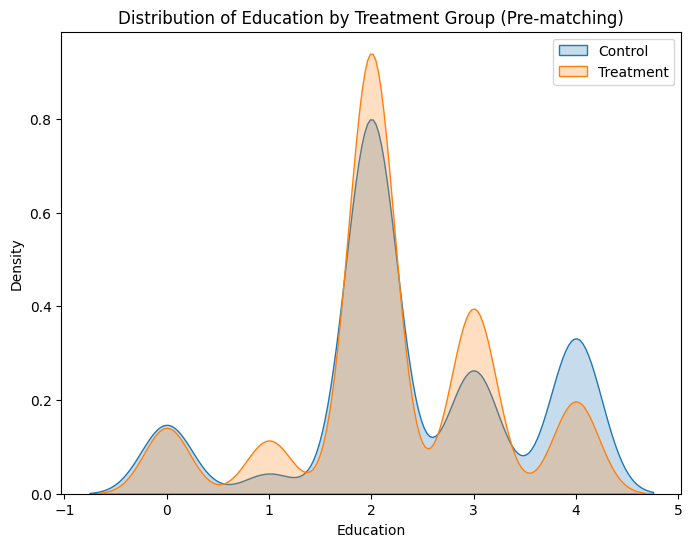

C:\Users\Abhishek Bhat\AppData\Local\Temp\ipykernel_18072\145070435.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[covariate][data['T/C'] == 0], label='Control', shade=True)
C:\Users\Abhishek Bhat\AppData\Local\Temp\ipykernel_18072\145070435.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[covariate][data['T/C'] == 1], label='Treatment', shade=True)


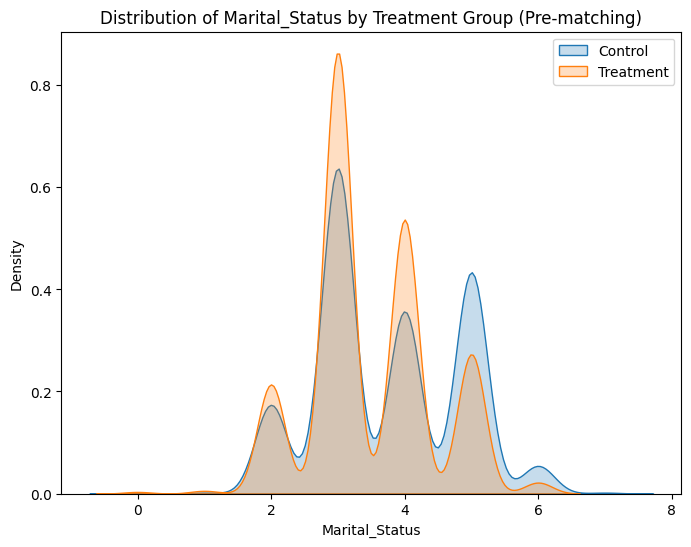

C:\Users\Abhishek Bhat\AppData\Local\Temp\ipykernel_18072\145070435.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[covariate][data['T/C'] == 0], label='Control', shade=True)
C:\Users\Abhishek Bhat\AppData\Local\Temp\ipykernel_18072\145070435.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[covariate][data['T/C'] == 1], label='Treatment', shade=True)


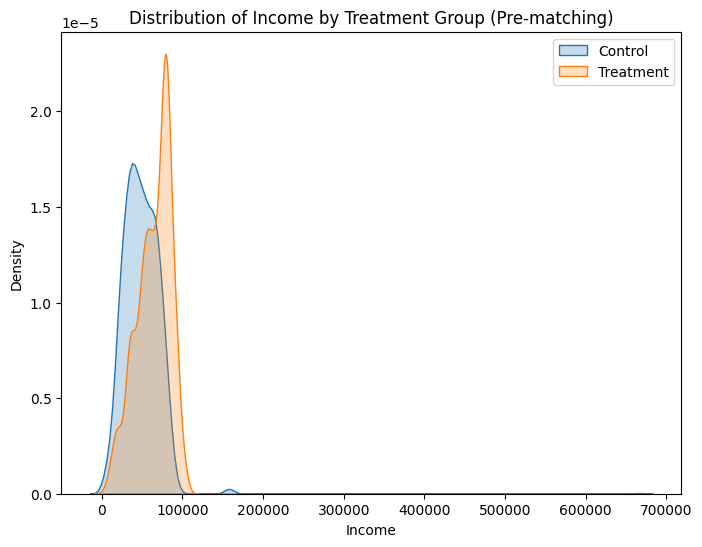

C:\Users\Abhishek Bhat\AppData\Local\Temp\ipykernel_18072\145070435.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[covariate][data['T/C'] == 0], label='Control', shade=True)
C:\Users\Abhishek Bhat\AppData\Local\Temp\ipykernel_18072\145070435.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[covariate][data['T/C'] == 1], label='Treatment', shade=True)


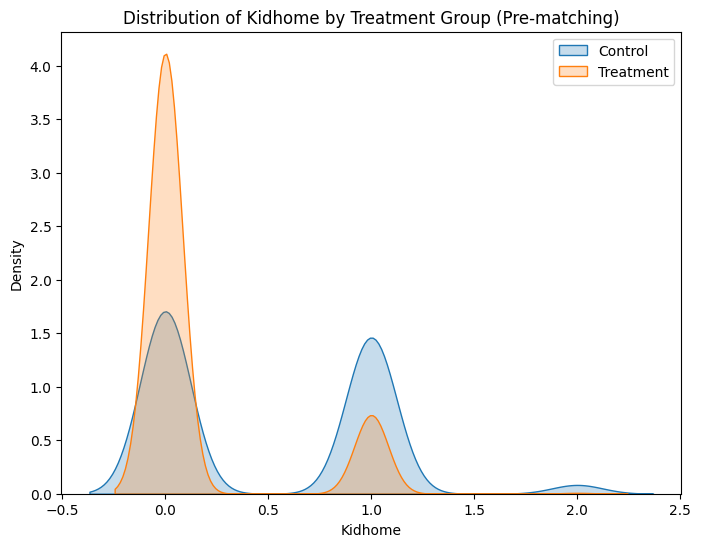

C:\Users\Abhishek Bhat\AppData\Local\Temp\ipykernel_18072\145070435.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[covariate][data['T/C'] == 0], label='Control', shade=True)
C:\Users\Abhishek Bhat\AppData\Local\Temp\ipykernel_18072\145070435.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[covariate][data['T/C'] == 1], label='Treatment', shade=True)


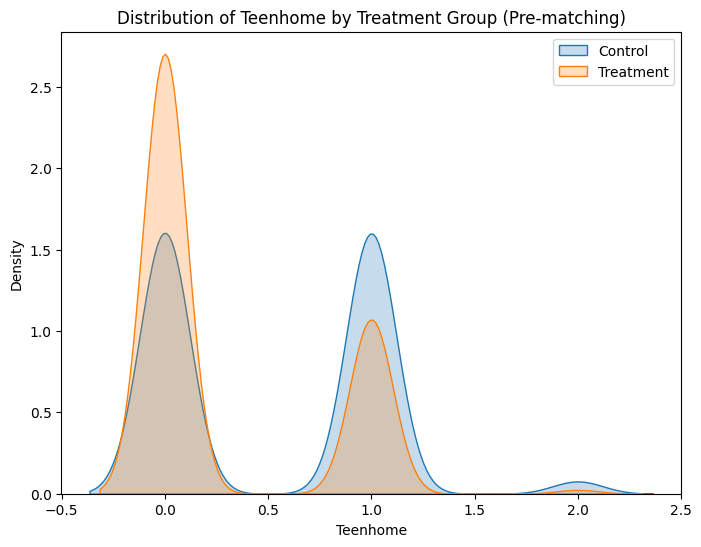

C:\Users\Abhishek Bhat\AppData\Local\Temp\ipykernel_18072\145070435.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[covariate][data['T/C'] == 0], label='Control', shade=True)
C:\Users\Abhishek Bhat\AppData\Local\Temp\ipykernel_18072\145070435.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[covariate][data['T/C'] == 1], label='Treatment', shade=True)


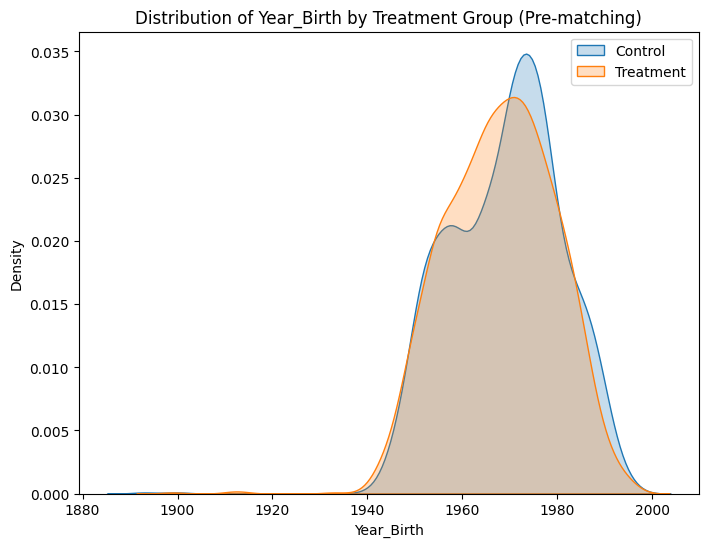

In [2]:
# Compare covariate distributions before matching
for covariate in X.columns:
    plt.figure(figsize=(8, 6))
    sns.kdeplot(data[covariate][data['T/C'] == 0], label='Control', shade=True)
    sns.kdeplot(data[covariate][data['T/C'] == 1], label='Treatment', shade=True)
    plt.title(f'Distribution of {covariate} by Treatment Group (Pre-matching)')
    plt.xlabel(covariate)
    plt.ylabel('Density')
    plt.legend()
    plt.show()


2.Pre-matching Standardized Mean Differences (SMD):

In [3]:
import numpy as np

def calculate_smd(covariate, treatment_group, control_group):
    treated_mean = treatment_group[covariate].mean()
    control_mean = control_group[covariate].mean()
    treated_std = treatment_group[covariate].std()
    control_std = control_group[covariate].std()

    smd = (treated_mean - control_mean) / np.sqrt((treated_std**2 + control_std**2) / 2)
    return smd

# Assuming 'df' is your DataFrame and 'T/C' column contains 1 for treatment and 0 for control
# Split the data into treatment and control groups based on 'T/C'
treatment_group = data[data['T/C'] == 1]
control_group = data[data['T/C'] == 0]

# List of covariates (all columns excluding 'ID', 'T/C', 'TotalAmountSpent')
covariates = [col for col in data.columns if col not in ['ID', 'T/C', 'TotalAmountSpent']]

# Calculate SMD for each covariate before matching
smd_pre = {covariate: calculate_smd(covariate, treatment_group, control_group) for covariate in covariates}

print("Standardized Mean Differences (Pre-matching):")
print(smd_pre)


Standardized Mean Differences (Pre-matching):
{'Year_Birth': -0.10320542634326638, 'Education': -0.14249585522869448, 'Marital_Status': -0.2540438730684651, 'Income': 0.6699073042509587, 'Kidhome': -0.7408224997998061, 'Teenhome': -0.4722649813499302, 'Recency': -0.03738633606496743, 'Item A': 1.159356714405744, 'Item B': 0.29572408075262807, 'Item C': 0.6351972022561277, 'Item D': 0.3957037845854623, 'Item E': 0.3855761333706307, 'Item F': 0.4792749487727861, 'AcceptedCmp3': 0.8257603825469335, 'AcceptedCmp4': 0.7262515279685204, 'AcceptedCmp5': 0.8490468004957222, 'AcceptedCmp1': 0.6549911403790424, 'AcceptedCmp2': 0.20330339425814756, 'propensity_score': 1.0532976092087394}


3. Pre-matching Propensity Score Distribution Check:

C:\Users\Abhishek Bhat\AppData\Local\Temp\ipykernel_18072\651496600.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data['propensity_score'][data['T/C'] == 0], label='Control', shade=True)
C:\Users\Abhishek Bhat\AppData\Local\Temp\ipykernel_18072\651496600.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data['propensity_score'][data['T/C'] == 1], label='Treatment', shade=True)


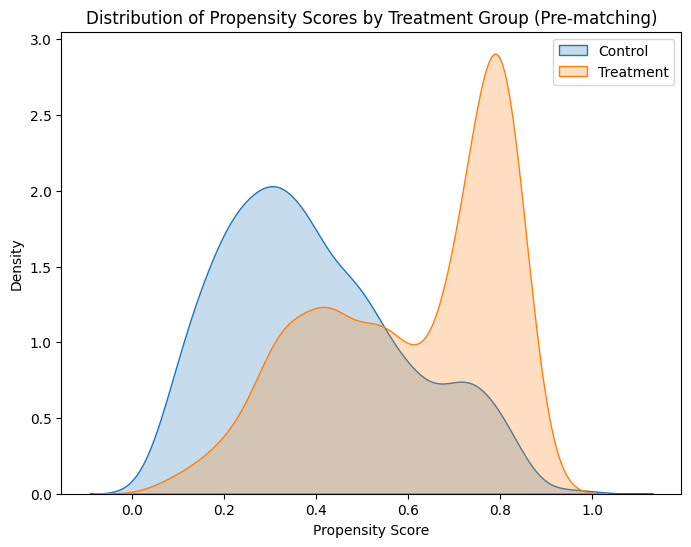

In [4]:
# Plot the distribution of propensity scores for treatment and control groups (before matching)
plt.figure(figsize=(8, 6))
sns.kdeplot(data['propensity_score'][data['T/C'] == 0], label='Control', shade=True)
sns.kdeplot(data['propensity_score'][data['T/C'] == 1], label='Treatment', shade=True)
plt.title('Distribution of Propensity Scores by Treatment Group (Pre-matching)')
plt.xlabel('Propensity Score')
plt.ylabel('Density')
plt.legend()
plt.show()


Propensity Score Matching(PSM)

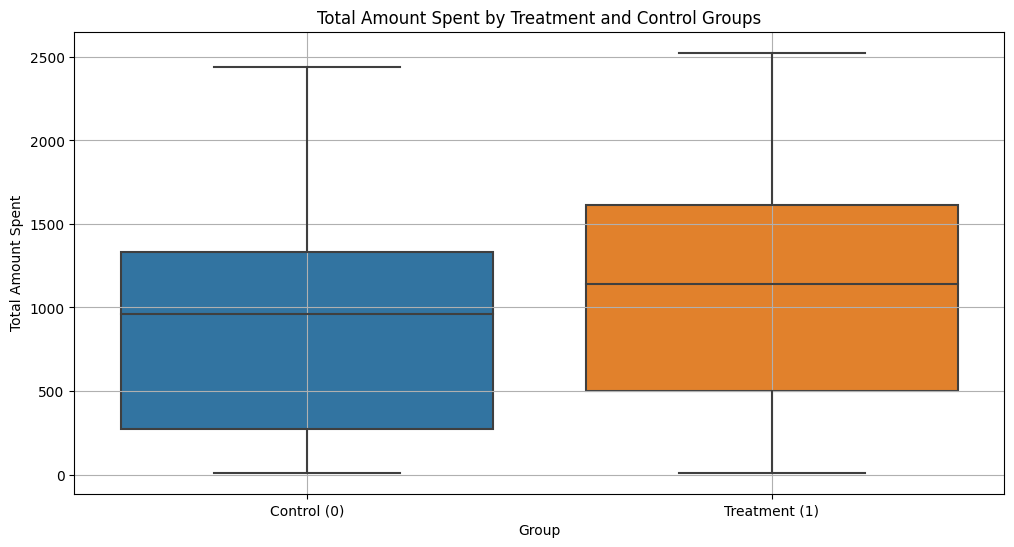

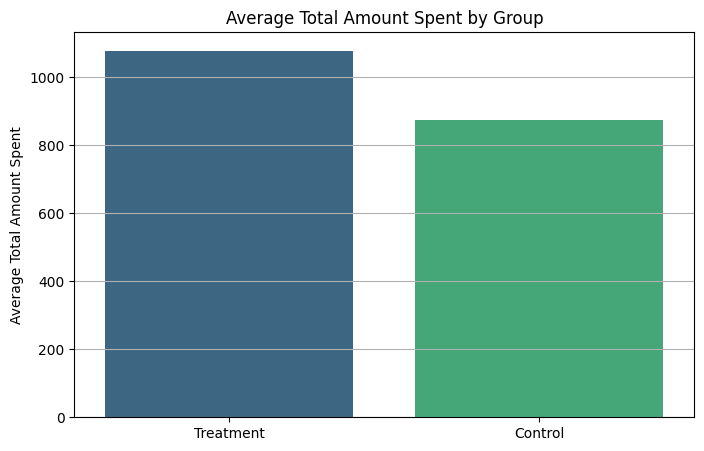

Estimated Average Treatment Effect (ATE): $203.3382104670793


In [5]:
from sklearn.neighbors import NearestNeighbors

# Step 2: Matching based on propensity scores
# Get propensity scores for treatment and control groups
treatment_scores = treatment['propensity_score']
control_scores = control['propensity_score']

# Nearest Neighbor Matching: Find closest matches in control group for each treated individual
nbrs = NearestNeighbors(n_neighbors=1).fit(control_scores.values.reshape(-1, 1))
distances, indices = nbrs.kneighbors(treatment_scores.values.reshape(-1, 1))

# Select matched control units
matched_control_indices = indices.flatten()
matched_controls = control.iloc[matched_control_indices]

# Combine matched treatment and control data
matched_data = pd.concat([treatment, matched_controls])

# Step 3: Estimate the Treatment Effect
# Calculate the Average Treatment Effect (ATE)
ate = matched_data[matched_data['T/C'] == 1]['TotalAmountSpent'].mean() - matched_data[matched_data['T/C'] == 0]['TotalAmountSpent'].mean()

# Visualization
# Box Plot
plt.figure(figsize=(12, 6))
sns.boxplot(x='T/C', y='TotalAmountSpent', data=matched_data)
plt.xticks([0, 1], ['Control (0)', 'Treatment (1)'])
plt.title('Total Amount Spent by Treatment and Control Groups')
plt.xlabel('Group')
plt.ylabel('Total Amount Spent')
plt.grid(True)
plt.show()

# Bar Chart
ate_values = [matched_data[matched_data['T/C'] == 1]['TotalAmountSpent'].mean(),
              matched_data[matched_data['T/C'] == 0]['TotalAmountSpent'].mean()]

labels = ['Treatment', 'Control']
plt.figure(figsize=(8, 5))
sns.barplot(x=labels, y=ate_values, palette='viridis')
plt.title('Average Total Amount Spent by Group')
plt.ylabel('Average Total Amount Spent')
plt.grid(axis='y')
plt.show()

print(f"Estimated Average Treatment Effect (ATE): ${ate}")


This suggests that, on average, customers who were exposed to the marketing campaign spent approximately $203.34 more than those who were not exposed to the campaign. This is a significant effect, indicating that the campaign likely had a positive impact on spending.

After PSM (Post-Matching)

1. Post-matching Covariate Distribution Check:

C:\Users\Abhishek Bhat\AppData\Local\Temp\ipykernel_18072\4251812100.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(matched_data[covariate][matched_data['T/C'] == 0], label='Control', shade=True)
C:\Users\Abhishek Bhat\AppData\Local\Temp\ipykernel_18072\4251812100.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(matched_data[covariate][matched_data['T/C'] == 1], label='Treatment', shade=True)


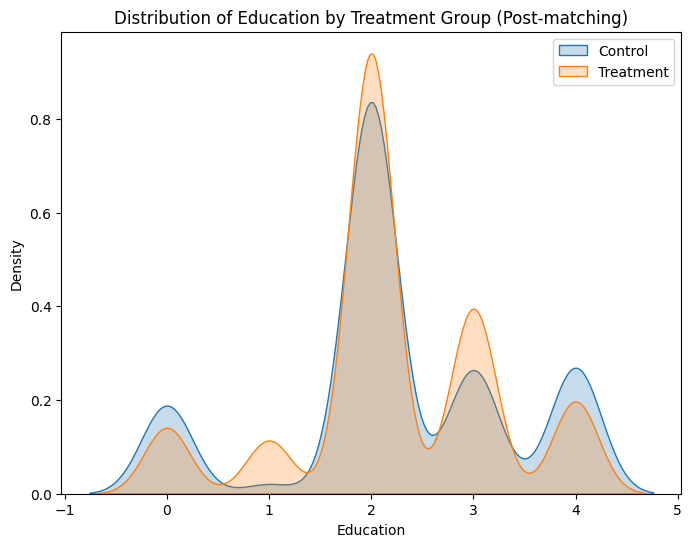

C:\Users\Abhishek Bhat\AppData\Local\Temp\ipykernel_18072\4251812100.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(matched_data[covariate][matched_data['T/C'] == 0], label='Control', shade=True)
C:\Users\Abhishek Bhat\AppData\Local\Temp\ipykernel_18072\4251812100.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(matched_data[covariate][matched_data['T/C'] == 1], label='Treatment', shade=True)


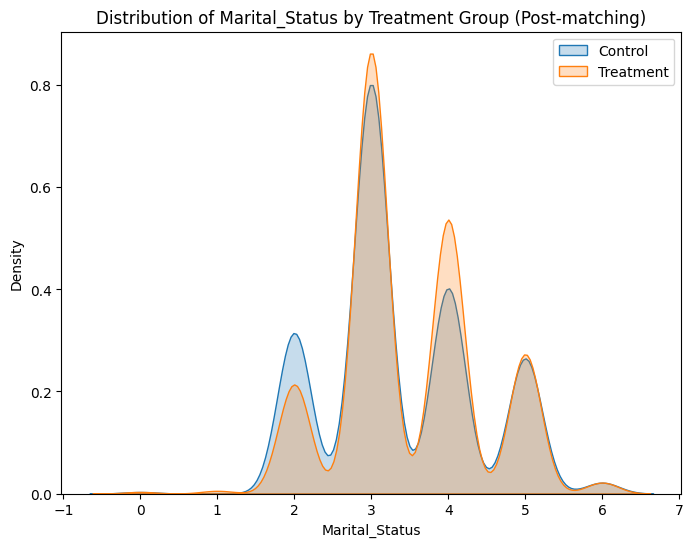

C:\Users\Abhishek Bhat\AppData\Local\Temp\ipykernel_18072\4251812100.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(matched_data[covariate][matched_data['T/C'] == 0], label='Control', shade=True)
C:\Users\Abhishek Bhat\AppData\Local\Temp\ipykernel_18072\4251812100.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(matched_data[covariate][matched_data['T/C'] == 1], label='Treatment', shade=True)


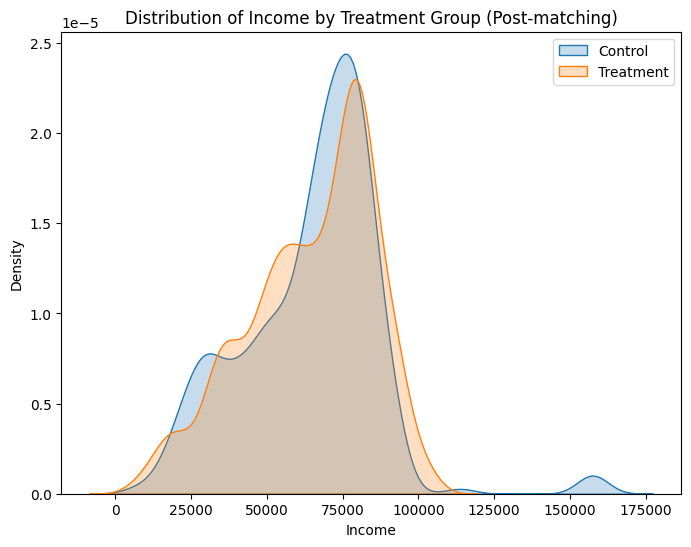

C:\Users\Abhishek Bhat\AppData\Local\Temp\ipykernel_18072\4251812100.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(matched_data[covariate][matched_data['T/C'] == 0], label='Control', shade=True)
C:\Users\Abhishek Bhat\AppData\Local\Temp\ipykernel_18072\4251812100.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(matched_data[covariate][matched_data['T/C'] == 1], label='Treatment', shade=True)


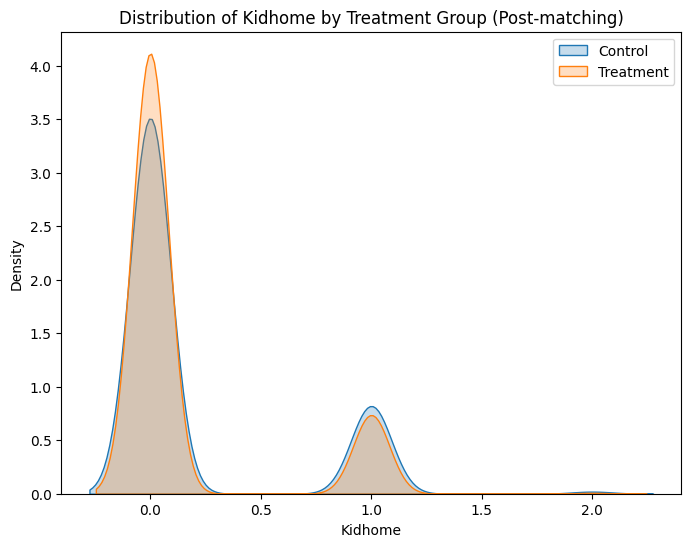

C:\Users\Abhishek Bhat\AppData\Local\Temp\ipykernel_18072\4251812100.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(matched_data[covariate][matched_data['T/C'] == 0], label='Control', shade=True)
C:\Users\Abhishek Bhat\AppData\Local\Temp\ipykernel_18072\4251812100.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(matched_data[covariate][matched_data['T/C'] == 1], label='Treatment', shade=True)


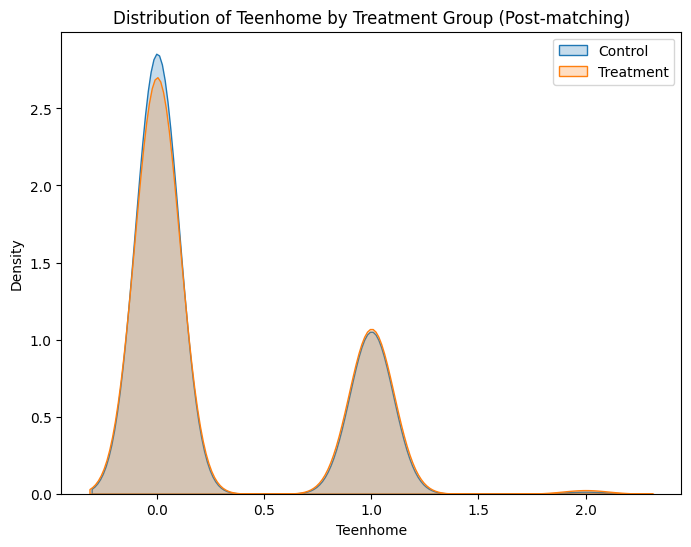

C:\Users\Abhishek Bhat\AppData\Local\Temp\ipykernel_18072\4251812100.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(matched_data[covariate][matched_data['T/C'] == 0], label='Control', shade=True)
C:\Users\Abhishek Bhat\AppData\Local\Temp\ipykernel_18072\4251812100.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(matched_data[covariate][matched_data['T/C'] == 1], label='Treatment', shade=True)


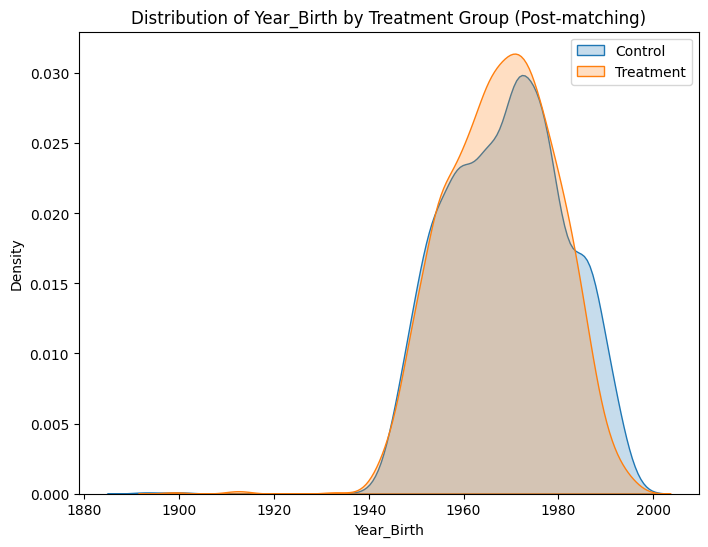

In [6]:
# Compare covariate distributions after matching
matched_data = pd.concat([treatment, matched_controls])

for covariate in X.columns:
    plt.figure(figsize=(8, 6))
    sns.kdeplot(matched_data[covariate][matched_data['T/C'] == 0], label='Control', shade=True)
    sns.kdeplot(matched_data[covariate][matched_data['T/C'] == 1], label='Treatment', shade=True)
    plt.title(f'Distribution of {covariate} by Treatment Group (Post-matching)')
    plt.xlabel(covariate)
    plt.ylabel('Density')
    plt.legend()
    plt.show()


2. Post-matching Standardized Mean Differences (SMD):

In [7]:
# Split the original data into treatment and control groups based on 'T/C'
treatment = data[data['T/C'] == 1]
matched_controls = data[data['T/C'] == 0]  # This would actually be replaced with your matched control group

# List of covariates (excluding 'ID', 'T/C', 'TotalAmountSpent' as they aren't used in SMD calculation)
covariates = [col for col in data.columns if col not in ['ID', 'T/C', 'TotalAmountSpent']]

# Calculate SMD for each covariate after matching
smd_post = {covariate: calculate_smd(covariate, treatment, matched_controls) for covariate in covariates}

print("Standardized Mean Differences (Post-matching):")
print(smd_post)

Standardized Mean Differences (Post-matching):
{'Year_Birth': -0.10320542634326638, 'Education': -0.14249585522869448, 'Marital_Status': -0.2540438730684651, 'Income': 0.6699073042509587, 'Kidhome': -0.7408224997998061, 'Teenhome': -0.4722649813499302, 'Recency': -0.03738633606496743, 'Item A': 1.159356714405744, 'Item B': 0.29572408075262807, 'Item C': 0.6351972022561277, 'Item D': 0.3957037845854623, 'Item E': 0.3855761333706307, 'Item F': 0.4792749487727861, 'AcceptedCmp3': 0.8257603825469335, 'AcceptedCmp4': 0.7262515279685204, 'AcceptedCmp5': 0.8490468004957222, 'AcceptedCmp1': 0.6549911403790424, 'AcceptedCmp2': 0.20330339425814756, 'propensity_score': 1.0532976092087394}


3. Post-matching Propensity Score Distribution Check:

C:\Users\Abhishek Bhat\AppData\Local\Temp\ipykernel_18072\2582447673.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(matched_data['propensity_score'][matched_data['T/C'] == 0], label='Control', shade=True)
C:\Users\Abhishek Bhat\AppData\Local\Temp\ipykernel_18072\2582447673.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(matched_data['propensity_score'][matched_data['T/C'] == 1], label='Treatment', shade=True)


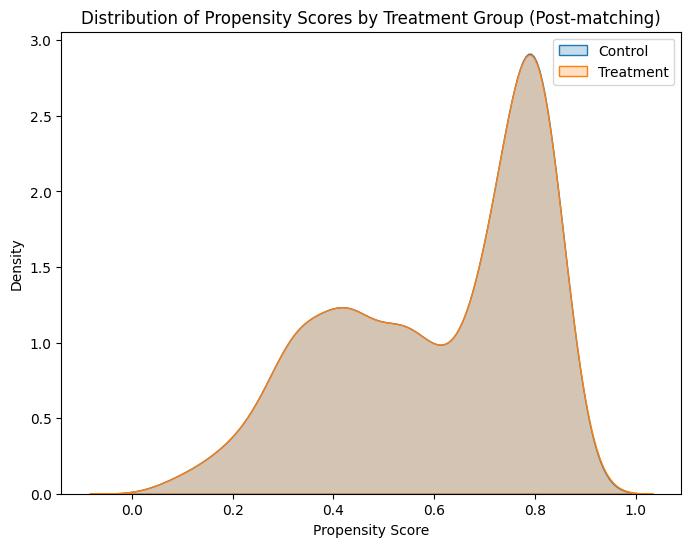

In [8]:
# Plot the distribution of propensity scores for treatment and control groups (post-matching)
plt.figure(figsize=(8, 6))
sns.kdeplot(matched_data['propensity_score'][matched_data['T/C'] == 0], label='Control', shade=True)
sns.kdeplot(matched_data['propensity_score'][matched_data['T/C'] == 1], label='Treatment', shade=True)
plt.title('Distribution of Propensity Scores by Treatment Group (Post-matching)')
plt.xlabel('Propensity Score')
plt.ylabel('Density')
plt.legend()
plt.show()


Additional Check: Sensitivity of ATE to Covariates

In [9]:
# Example of changing covariates and recalculating the ATE
adjusted_data = data.copy()
adjusted_data['Income'] = adjusted_data['Income'] * 1.1  # Increase income by 10%

# Re-estimate propensity scores and matching process
log_model.fit(adjusted_data[['Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome', 'Year_Birth']], adjusted_data['T/C'])
adjusted_data['propensity_score'] = log_model.predict_proba(adjusted_data[['Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome', 'Year_Birth']])[:, 1]

# Reapply matching and calculate new ATE
treatment = adjusted_data[adjusted_data['T/C'] == 1]
control = adjusted_data[adjusted_data['T/C'] == 0]

treatment_scores = treatment['propensity_score']
control_scores = control['propensity_score']

nbrs = NearestNeighbors(n_neighbors=1).fit(control_scores.values.reshape(-1, 1))
distances, indices = nbrs.kneighbors(treatment_scores.values.reshape(-1, 1))

matched_control_indices = indices.flatten()
matched_controls = control.iloc[matched_control_indices]

matched_data = pd.concat([treatment, matched_controls])

# Calculate new ATE after adjustment
new_ate = matched_data[matched_data['T/C'] == 1]['TotalAmountSpent'].mean() - matched_data[matched_data['T/C'] == 0]['TotalAmountSpent'].mean()

print(f"New Estimated ATE after income adjustment: ${new_ate}")


New Estimated ATE after income adjustment: $200.97861564434436


c:\Users\Abhishek Bhat\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [10]:
# Example of changing covariates and recalculating the ATE
adjusted_data = data.copy()
adjusted_data['Year_Birth'] = adjusted_data['Year_Birth'] * 1.1  # Increase income by 10%

# Re-estimate propensity scores and matching process
log_model.fit(adjusted_data[['Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome', 'Year_Birth']], adjusted_data['T/C'])
adjusted_data['propensity_score'] = log_model.predict_proba(adjusted_data[['Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome', 'Year_Birth']])[:, 1]

# Reapply matching and calculate new ATE
treatment = adjusted_data[adjusted_data['T/C'] == 1]
control = adjusted_data[adjusted_data['T/C'] == 0]

treatment_scores = treatment['propensity_score']
control_scores = control['propensity_score']

nbrs = NearestNeighbors(n_neighbors=1).fit(control_scores.values.reshape(-1, 1))
distances, indices = nbrs.kneighbors(treatment_scores.values.reshape(-1, 1))

matched_control_indices = indices.flatten()
matched_controls = control.iloc[matched_control_indices]

matched_data = pd.concat([treatment, matched_controls])

# Calculate new ATE after adjustment
new_ate = matched_data[matched_data['T/C'] == 1]['TotalAmountSpent'].mean() - matched_data[matched_data['T/C'] == 0]['TotalAmountSpent'].mean()

print(f"New Estimated ATE after income adjustment: ${new_ate}")


New Estimated ATE after income adjustment: $198.58413055711878


c:\Users\Abhishek Bhat\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


finding confounding variables

In [13]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols, logit

# Load your data
data = pd.read_csv("C:/Users/Abhishek Bhat/balanced_marketing_campaign.csv")  # Use the appropriate file path

# Step 1: Identify covariates (assume all columns except treatment, outcome, and propensity score are covariates)
covariates = [col for col in data.columns if col not in ['T/C', 'TotalAmountSpent', 'propensity_score', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Item A', 'Item B', 'Item C', 'Item D', 'Item E', 'Item F']]

# Initialize lists to store potential confounders
confounders = []

# Step 2: Check association between each covariate and treatment assignment
for covariate in covariates:
    # Logistic regression to check association with treatment
    model = logit(f'Q("T/C") ~ Q("{covariate}")', data=data)
    result = model.fit(disp=0)
    
    # If p-value < 0.05, covariate is significantly associated with treatment
    if result.pvalues[1] < 0.05:
        # Check association with outcome (TotalAmountSpent) using linear regression
        outcome_model = ols(f'TotalAmountSpent ~ Q("{covariate}")', data=data).fit()
        
        # If p-value < 0.05, covariate is also significantly associated with the outcome
        if outcome_model.pvalues[1] < 0.05:
            confounders.append(covariate)

# Display potential confounders
print("Potential Confounders:", confounders)


Potential Confounders: ['Year_Birth', 'Income', 'Kidhome', 'Teenhome']


PSM after finding potential confounders

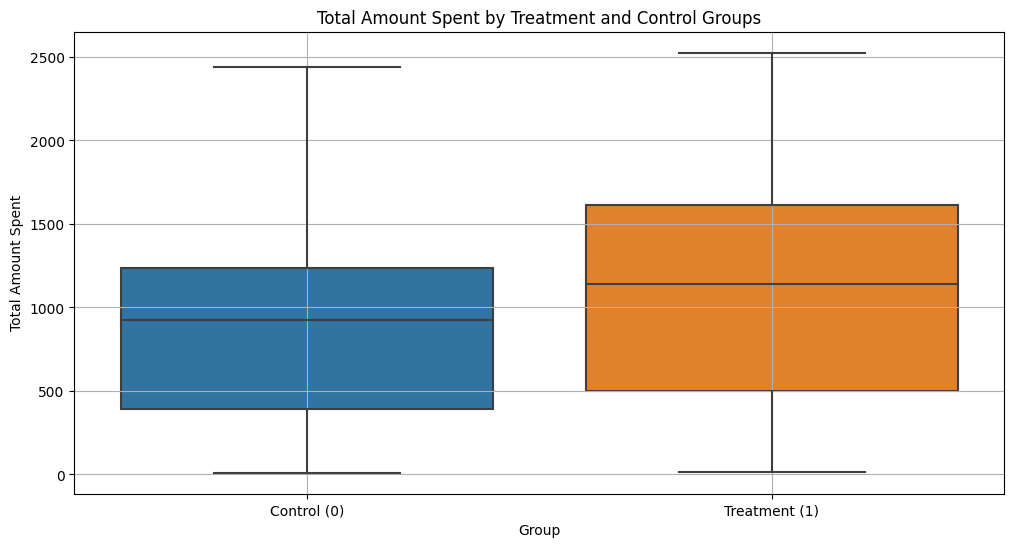

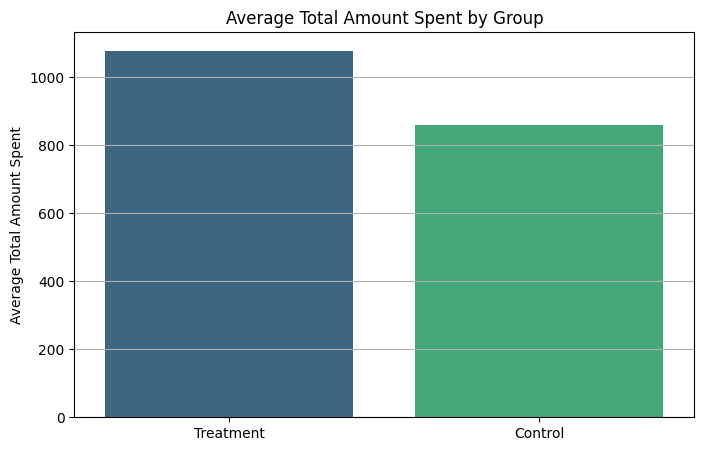

Estimated Average Treatment Effect (ATE): $220.1727630838492


In [14]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
import seaborn as sns

# Load your data
data = pd.read_csv("C:/Users/Abhishek Bhat/balanced_marketing_campaign.csv")  # Use the appropriate file path

# Step 1: Estimate Propensity Scores with Confounders
# Define the confounders and treatment column
confounders = ['Year_Birth', 'Income', 'Kidhome', 'Teenhome']
X = data[confounders]  # Features (covariates)
y = data['T/C']  # Treatment indicator

# Logistic regression to estimate propensity scores
log_reg = LogisticRegression()
log_reg.fit(X, y)
data['propensity_score'] = log_reg.predict_proba(X)[:, 1]

# Split data into treatment and control groups based on 'T/C' column
treatment = data[data['T/C'] == 1]
control = data[data['T/C'] == 0]

# Step 2: Matching based on propensity scores
# Get propensity scores for treatment and control groups
treatment_scores = treatment['propensity_score']
control_scores = control['propensity_score']

# Nearest Neighbor Matching: Find closest matches in control group for each treated individual
nbrs = NearestNeighbors(n_neighbors=1).fit(control_scores.values.reshape(-1, 1))
distances, indices = nbrs.kneighbors(treatment_scores.values.reshape(-1, 1))

# Select matched control units
matched_control_indices = indices.flatten()
matched_controls = control.iloc[matched_control_indices]

# Combine matched treatment and control data
matched_data = pd.concat([treatment, matched_controls])

# Step 3: Estimate the Treatment Effect
# Calculate the Average Treatment Effect (ATE)
ate = matched_data[matched_data['T/C'] == 1]['TotalAmountSpent'].mean() - matched_data[matched_data['T/C'] == 0]['TotalAmountSpent'].mean()

# Visualization
# Box Plot
plt.figure(figsize=(12, 6))
sns.boxplot(x='T/C', y='TotalAmountSpent', data=matched_data)
plt.xticks([0, 1], ['Control (0)', 'Treatment (1)'])
plt.title('Total Amount Spent by Treatment and Control Groups')
plt.xlabel('Group')
plt.ylabel('Total Amount Spent')
plt.grid(True)
plt.show()

# Bar Chart
ate_values = [matched_data[matched_data['T/C'] == 1]['TotalAmountSpent'].mean(),
              matched_data[matched_data['T/C'] == 0]['TotalAmountSpent'].mean()]

labels = ['Treatment', 'Control']
plt.figure(figsize=(8, 5))
sns.barplot(x=labels, y=ate_values, palette='viridis')
plt.title('Average Total Amount Spent by Group')
plt.ylabel('Average Total Amount Spent')
plt.grid(axis='y')
plt.show()

print(f"Estimated Average Treatment Effect (ATE): ${ate}")


value of ATE before taking into account potential confounders was around 203, and now as shown above after taking into account potential confounders it has increased to around 220.

Causal graph

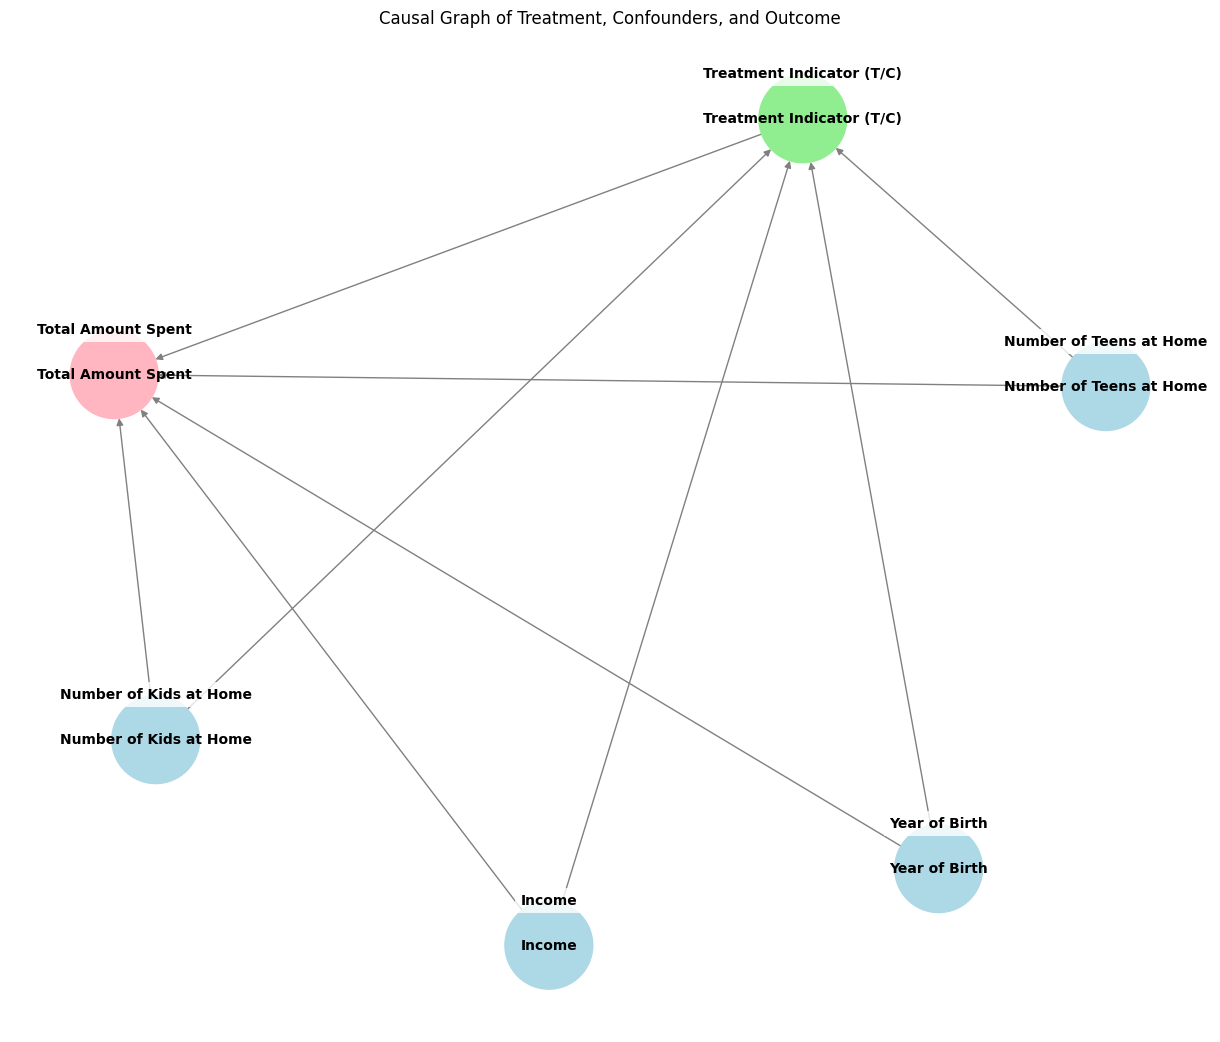

In [36]:
import networkx as nx
import matplotlib.pyplot as plt

# Step 4: Create a Causal Graph

# Define the causal relationships
G = nx.DiGraph()

# Add nodes (variables)
G.add_node('T/C', label='Treatment Indicator (T/C)')
G.add_node('Year_Birth', label='Year of Birth')
G.add_node('Income', label='Income')
G.add_node('Kidhome', label='Number of Kids at Home')
G.add_node('Teenhome', label='Number of Teens at Home')
G.add_node('TotalAmountSpent', label='Total Amount Spent')


# Add edges (relationships between variables)
G.add_edges_from([
    ('Year_Birth', 'T/C'),  # Confounder influences Treatment
    ('Income', 'T/C'),  # Confounder influences Treatment
    ('Kidhome', 'T/C'),  # Confounder influences Treatment
    ('Teenhome', 'T/C'),  # Confounder influences Treatment
    ('T/C', 'TotalAmountSpent'),  # Treatment influences Outcome
    ('Year_Birth', 'TotalAmountSpent'),  # Confounder influences Outcome
    ('Income', 'TotalAmountSpent'),  # Confounder influences Outcome
    ('Kidhome', 'TotalAmountSpent'),  # Confounder influences Outcome
    ('Teenhome', 'TotalAmountSpent')  # Confounder influences Outcome
])

# Visualize the causal graph with improved layout
pos = nx.spring_layout(G, seed=42, k=0.9)  # Adjust 'k' for node spacing, use 'seed' for reproducibility

# Get labels for nodes
labels = nx.get_node_attributes(G, 'label')

# Set up the plot
plt.figure(figsize=(12, 10))

# Node color mapping
node_colors = []
for node in G.nodes():
    if node == 'T/C':
        node_colors.append('lightgreen')  # Treatment
    elif node == 'TotalAmountSpent':
        node_colors.append('lightpink')  # Outcome
    else:
        node_colors.append('lightblue')  # Confounders

# Draw the graph with the color mapping
nx.draw(G, pos, with_labels=False, node_size=4000, node_color=node_colors, font_size=10, font_weight='bold', edge_color='gray')

# Draw node labels with custom positions and font adjustments for readability
nx.draw_networkx_labels(G, pos, labels=labels, font_size=10, font_weight='bold', font_color="black")

# Offset each label slightly to improve readability
for label, (x, y) in pos.items():
    plt.text(x, y + 0.08, labels[label], fontsize=10, ha='center', va='center', fontweight='bold', bbox=dict(facecolor='white', alpha=0.8, edgecolor='none'))

plt.title('Causal Graph of Treatment, Confounders, and Outcome')
plt.axis('off')  # Hide axes for a cleaner look
plt.show()

Function without taking into consideration Potential Confounders

c:\Users\Abhishek Bhat\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


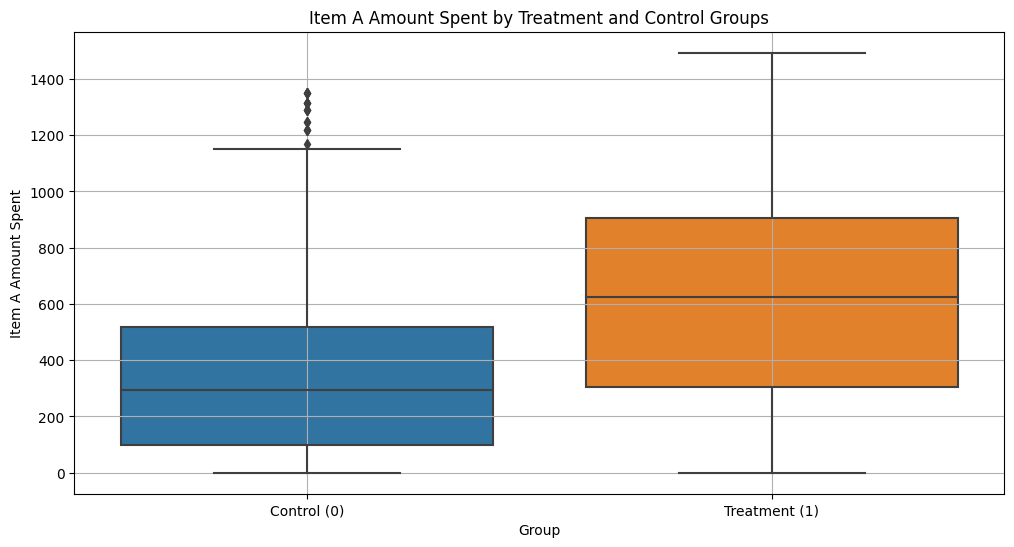

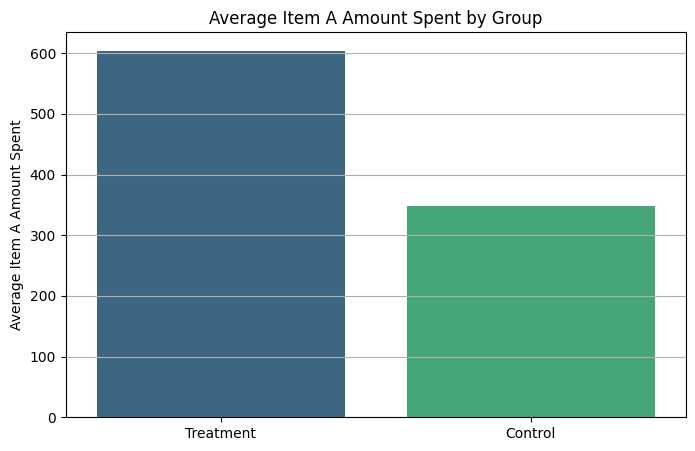

Estimated Average Treatment Effect (ATE) for Item A: $256.7979741136747


In [21]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import NearestNeighbors
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('balanced_marketing_campaign.csv')

# Define function to estimate ATE based on user-provided covariates and specified item
def estimate_ate_for_item(covariates, item_column):
    """
    Estimate the Average Treatment Effect (ATE) on the specified item using user-provided covariates.

    Parameters:
    - covariates: dict, e.g., {"Education": 2, "Marital_Status": 1, "Income": 50000, "Kidhome": 1, "Teenhome": 0, "Year_Birth": 1980}
    - item_column: str, one of ['Item A', 'Item B', 'Item C', 'Item D', 'Item E', 'Item F']

    Returns:
    - Estimated ATE and visualizations of the treatment effect on the specified item.
    """
    # Extract covariates
    X = data[['Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome', 'Year_Birth']]
    Y = data[item_column]            # Outcome variable for the specified item
    T = data['T/C']                  # Treatment indicator
    
    # Estimate Propensity Scores using Logistic Regression
    log_model = LogisticRegression()
    log_model.fit(X, T)
    data['propensity_score'] = log_model.predict_proba(X)[:, 1]
    
    # Separate data for treatment and control groups
    treatment = data[data['T/C'] == 1]
    control = data[data['T/C'] == 0]
    treatment_scores = treatment['propensity_score']
    control_scores = control['propensity_score']

    # Nearest Neighbor Matching
    nbrs = NearestNeighbors(n_neighbors=1).fit(control_scores.values.reshape(-1, 1))
    distances, indices = nbrs.kneighbors(treatment_scores.values.reshape(-1, 1))
    matched_control_indices = indices.flatten()
    matched_controls = control.iloc[matched_control_indices]

    # Combine matched treatment and control data
    matched_data = pd.concat([treatment, matched_controls])
    
    # Calculate the Average Treatment Effect (ATE)
    ate = matched_data[matched_data['T/C'] == 1][item_column].mean() - matched_data[matched_data['T/C'] == 0][item_column].mean()
    
    # Visualization
    # Box Plot
    plt.figure(figsize=(12, 6))
    sns.boxplot(x='T/C', y=item_column, data=matched_data)
    plt.xticks([0, 1], ['Control (0)', 'Treatment (1)'])
    plt.title(f'{item_column} Amount Spent by Treatment and Control Groups')
    plt.xlabel('Group')
    plt.ylabel(f'{item_column} Amount Spent')
    plt.grid(True)
    plt.show()

    # Bar Chart for Average Treatment Effect
    ate_values = [matched_data[matched_data['T/C'] == 1][item_column].mean(),
                  matched_data[matched_data['T/C'] == 0][item_column].mean()]

    labels = ['Treatment', 'Control']
    plt.figure(figsize=(8, 5))
    sns.barplot(x=labels, y=ate_values, palette='viridis')
    plt.title(f'Average {item_column} Amount Spent by Group')
    plt.ylabel(f'Average {item_column} Amount Spent')
    plt.grid(axis='y')
    plt.show()
    
    print(f"Estimated Average Treatment Effect (ATE) for {item_column}: ${ate}")

# Example usage with user inputs for covariates and item
# In practice, these covariates and item would be provided by an LLM based on user prompts
covariates_example = {"Education": 2, "Marital_Status": 1, "Income": 200000, "Kidhome": 3, "Teenhome": 1, "Year_Birth": 1980}
estimate_ate_for_item(covariates=covariates_example, item_column="Item A")


Function with taking into consideration Potential Confounders

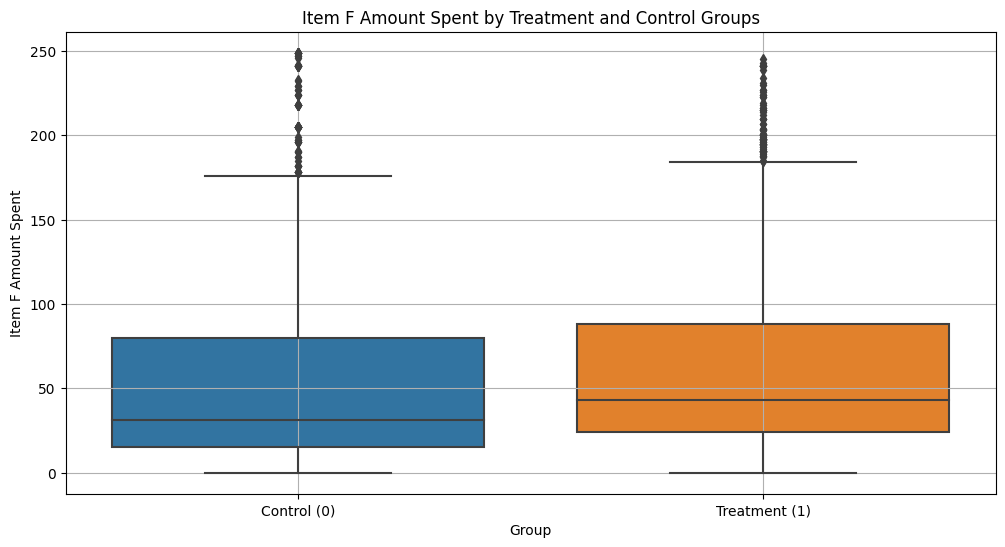

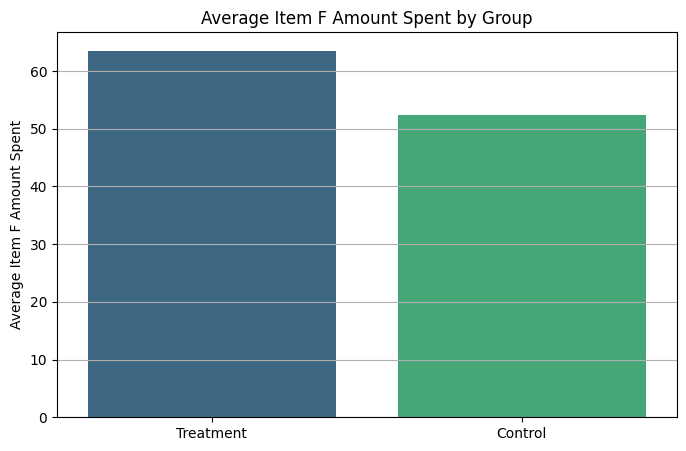

Estimated Average Treatment Effect (ATE) for Item F: $11.18401800787845


In [25]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import NearestNeighbors
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('balanced_marketing_campaign.csv')

# Define function to estimate ATE based on user-provided covariates and specified item
def estimate_ate_for_item(covariates, item_column):
    """
    Estimate the Average Treatment Effect (ATE) on the specified item using user-provided covariates.

    Parameters:
    - covariates: dict, e.g., {"Education": 2, "Marital_Status": 1, "Income": 50000, "Kidhome": 1, "Teenhome": 0, "Year_Birth": 1980}
    - item_column: str, one of ['Item A', 'Item B', 'Item C', 'Item D', 'Item E', 'Item F']

    Returns:
    - Estimated ATE and visualizations of the treatment effect on the specified item.
    """
    # Define the potential confounders
    confounders = ['Year_Birth', 'Income', 'Kidhome', 'Teenhome']
    
    # Extract covariates including the potential confounders
    X = data[confounders]
    Y = data[item_column]  # Outcome variable for the specified item
    T = data['T/C']        # Treatment indicator
    
    # Estimate Propensity Scores using Logistic Regression with confounders
    log_model = LogisticRegression()
    log_model.fit(X, T)
    data['propensity_score'] = log_model.predict_proba(X)[:, 1]
    
    # Separate data for treatment and control groups
    treatment = data[data['T/C'] == 1]
    control = data[data['T/C'] == 0]
    treatment_scores = treatment['propensity_score']
    control_scores = control['propensity_score']

    # Nearest Neighbor Matching
    nbrs = NearestNeighbors(n_neighbors=1).fit(control_scores.values.reshape(-1, 1))
    distances, indices = nbrs.kneighbors(treatment_scores.values.reshape(-1, 1))
    matched_control_indices = indices.flatten()
    matched_controls = control.iloc[matched_control_indices]

    # Combine matched treatment and control data
    matched_data = pd.concat([treatment, matched_controls])
    
    # Calculate the Average Treatment Effect (ATE)
    ate = matched_data[matched_data['T/C'] == 1][item_column].mean() - matched_data[matched_data['T/C'] == 0][item_column].mean()
    
    # Visualization
    # Box Plot
    plt.figure(figsize=(12, 6))
    sns.boxplot(x='T/C', y=item_column, data=matched_data)
    plt.xticks([0, 1], ['Control (0)', 'Treatment (1)'])
    plt.title(f'{item_column} Amount Spent by Treatment and Control Groups')
    plt.xlabel('Group')
    plt.ylabel(f'{item_column} Amount Spent')
    plt.grid(True)
    plt.show()

    # Bar Chart for Average Treatment Effect
    ate_values = [matched_data[matched_data['T/C'] == 1][item_column].mean(),
                  matched_data[matched_data['T/C'] == 0][item_column].mean()]

    labels = ['Treatment', 'Control']
    plt.figure(figsize=(8, 5))
    sns.barplot(x=labels, y=ate_values, palette='viridis')
    plt.title(f'Average {item_column} Amount Spent by Group')
    plt.ylabel(f'Average {item_column} Amount Spent')
    plt.grid(axis='y')
    plt.show()
    
    print(f"Estimated Average Treatment Effect (ATE) for {item_column}: ${ate}")

# Example usage with user inputs for covariates and item
# In practice, these covariates and item would be provided by an LLM based on user prompts
covariates_example = {"Education": 2, "Marital_Status": 1, "Income": 200000, "Kidhome": 3, "Teenhome": 1, "Year_Birth": 1980}
estimate_ate_for_item(covariates=covariates_example, item_column="Item F")


The purpose of using propensity score adjustment is to control for confounding variables when estimating the treatment effect in observational studies. Propensity scores represent the probability of receiving treatment based on observed covariates (confounders), and they are used to match, weight, or stratify treated and untreated subjects to reduce bias in treatment effect estimation.

Including confounders in the propensity score model is essential for the following reasons:

Reduce Confounding Bias: Confounders are variables that influence both the treatment assignment and the outcome. If not accounted for, they can create a spurious association between treatment and outcome, leading to biased estimates of the treatment effect. Including these confounders in the propensity score model ensures that the groups being compared (treated vs. untreated) are similar with respect to these variables, thus mitigating confounding bias.

Improve Balance Between Groups: When confounders are included in the propensity score model, it helps achieve balance between the treated and untreated groups. The goal is to make the groups comparable, as if they were randomly assigned to the treatment. This balance allows for a more accurate comparison of outcomes between the groups.

Estimate the True Treatment Effect: By adjusting for confounders through propensity score methods, you are better able to estimate the causal effect of treatment. Without adjusting for confounders, the observed treatment effect could be influenced by variables that are not part of the treatment process but still affect the outcome.

In summary, including confounders in the propensity score model ensures that the treated and untreated groups are as similar as possible, which is key to obtaining an unbiased and valid estimate of the treatment effect.

Causal inference enhanced LLM

Dataset preview:
      ID  Year_Birth  Education  Marital_Status   Income  Kidhome  Teenhome  \
0   6653        1970          4               3  55158.0        1         1   
1   6181        1950          0               5  52203.0        0         0   
2  10001        1985          0               5   7500.0        1         0   
3   4692        1976          2               3   7500.0        1         0   
4   2611        1959          3               5  82576.0        0         0   

   Recency  Item A  Item B  ...  Item D  Item E  Item F  AcceptedCmp3  \
0       72     293       0  ...       4      11      23             0   
1       36     488      21  ...      56     108      28             0   
2       98       5      17  ...      13      14      34             0   
3       19       7       0  ...      13       7      32             1   
4       66    1206      55  ...     168      18      18             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  TotalAmoun

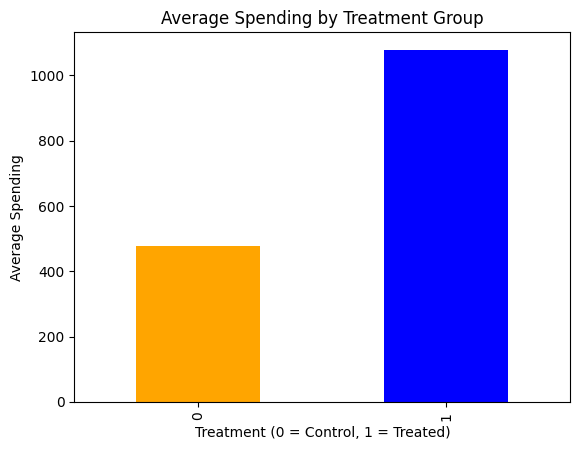

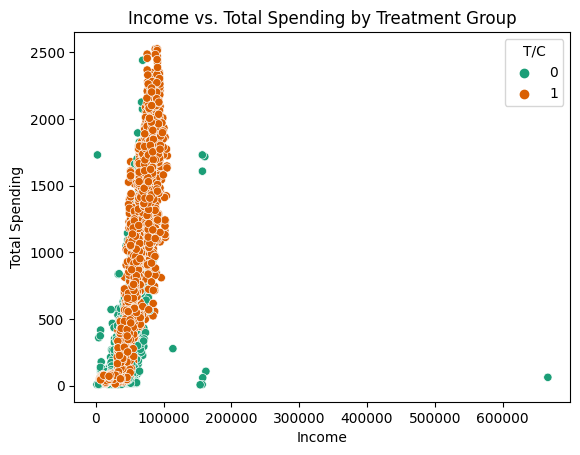

Impact of Causal Inference on LLM Response:
The causal inference results directly influenced the LLM-generated summary. For instance, it includes specific effect estimates (backdoor.propensity_score_matching: 167.25, backdoor.linear_regression: 203.00, backdoor.propensity_score_weighting: 181.18) and notes on robustness from sensitivity analysis. This adds quantitative and qualitative context to the response.


In [5]:
# Required imports
import pandas as pd
from dowhy import CausalModel
from sklearn.model_selection import train_test_split
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('balanced_marketing_campaign.csv')  # Update this path if needed

# Preview the dataset
print("Dataset preview:")
print(data.head())

# Step 1: Define variables for causal inference
treatment = 'T/C'  # Treatment indicator
outcome = 'TotalAmountSpent'  # Outcome variable
#features = ['Income', 'Education', 'Marital_Status']  # Add any other relevant covariates
features = ['Year_Birth', 'Income', 'Kidhome', 'Teenhome'] #Using potential confounders

# Step 2: Ensure proper data types and clean missing values
data = data.dropna(subset=[treatment, outcome] + features)

# Step 3: Set up the causal model
causal_model = CausalModel(
    data=data,
    treatment=treatment,
    outcome=outcome,
    common_causes=features
)

# Step 4: Identify causal effect
identified_estimand = causal_model.identify_effect(proceed_when_unidentifiable=True)
print("Identified estimand:", identified_estimand)

# Step 5: Estimate causal effect with multiple methods
methods = [
    "backdoor.propensity_score_matching",
    "backdoor.linear_regression",
    "backdoor.propensity_score_weighting"
]

effect_estimates = {}
for method in methods:
    estimate = causal_model.estimate_effect(identified_estimand, method_name=method)
    effect_estimates[method] = estimate.value
    print(f"Estimated Effect using {method}: {estimate.value}")

# Perform sensitivity analysis
print("Performing sensitivity analysis...")
sensitivity = causal_model.refute_estimate(identified_estimand, estimate, method_name="random_common_cause")
print("Sensitivity Analysis Result:", sensitivity)

# Step 6: Summarize using Hugging Face
# Load Hugging Face model for summarization
tokenizer = AutoTokenizer.from_pretrained("facebook/bart-large-cnn")
model = AutoModelForSeq2SeqLM.from_pretrained("facebook/bart-large-cnn")

# Function to summarize text
def summarize_text(text):
    inputs = tokenizer(text, max_length=1024, return_tensors="pt", truncation=True)
    summary_ids = model.generate(inputs["input_ids"], max_length=150, min_length=50, length_penalty=2.0, num_beams=4, early_stopping=True)
    return tokenizer.decode(summary_ids[0], skip_special_tokens=True)

# Generate detailed summary including sensitivity analysis
analysis_summary = (
    f"The estimated causal effects of the marketing campaign (T/C) on total spending (TotalAmountSpent) are: "
    + ", ".join([f"{method}: {value:.2f}" for method, value in effect_estimates.items()])
    + ". "
    f"Sensitivity analysis suggests that the results are {'robust' if sensitivity.refutation_result else 'not robust'} "
    "to hidden biases. "
    f"Key covariates considered include {', '.join(features)}."
)

llm_summary = summarize_text(analysis_summary)
print("LLM Summary of Causal Analysis:")
print(llm_summary)

# Step 7: Visualize results
# Average outcome by treatment group
group_summary = data.groupby(treatment)[outcome].mean()
group_summary.plot(kind='bar', color=['orange', 'blue'], title="Average Spending by Treatment Group")
plt.xlabel('Treatment (0 = Control, 1 = Treated)')
plt.ylabel('Average Spending')
plt.show()

# Scatter plot of key features vs. outcome
sns.scatterplot(x='Income', y=outcome, hue=treatment, data=data, palette='Dark2')
plt.title('Income vs. Total Spending by Treatment Group')
plt.xlabel('Income')
plt.ylabel('Total Spending')
plt.show()

# Step 8: Analyze how causal inference impacted LLM response
impact_analysis = (
    f"The causal inference results directly influenced the LLM-generated summary. "
    f"For instance, it includes specific effect estimates ({', '.join([f'{method}: {value:.2f}' for method, value in effect_estimates.items()])}) "
    f"and notes on robustness from sensitivity analysis. This adds quantitative and qualitative context to the response."
)
print("Impact of Causal Inference on LLM Response:")
print(impact_analysis)


1. Causal Inference Component
Purpose: Provides robust insights into cause-and-effect relationships in business analytics (e.g., marketing campaign effectiveness).
Implementation:
Using DoWhy to estimate causal effects of a treatment (e.g., marketing intervention) on business outcomes (e.g., total spending).
Employing multiple causal estimation methods for comparison and validation.
Adding sensitivity analysis ensures robustness of the causal inference.
2. LLM Enhancement
Purpose: Enhances the LLM's generated insights by embedding causal analysis findings.
Implementation:
Summarizing the results of causal inference using a Hugging Face model (BART for text summarization).
The LLM summary explicitly incorporates:
Effect estimates.
Robustness findings from sensitivity analysis.
Key variables influencing outcomes (features).
3. Business Analytics Context
Purpose: Addresses a typical business analytics scenario of evaluating marketing effectiveness.
Implementation:
Analysis of how treatment (e.g., marketing campaign) affects spending.
Insights provided through visualizations and causal estimates that are relevant for decision-makers.
4. Synergy Between Causal Inference and LLM
Purpose: Demonstrates how causal inference can enhance LLM output quality and relevance.
Implementation:
The LLM summary is causally informed by including quantitative estimates, validation, and robustness checks.
Added a section explicitly discussing how causal inference impacts the LLM’s output.